# 🌱 GHG Emission Prediction and Analysis  
**📌 Project Description:**                                              
####Predict future greenhouse gas emissions at the sector or organization level using supply-chain emission factor data (CO₂-equivalent). The model forecasts next-year emissions per industry sector by leveraging historical trends and relevant economic indicators.  
**Author:**       
 Priyanka Chandra  
**Internship:**    
AICTE Skill4Future  

In [78]:
from google.colab import drive

In [79]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##STEP 1 : Importing Libraries

Import the necessary Python libraries for:
- **Data manipulation** (`pandas`, `numpy`)
- **Data visualization** (`matplotlib`, `seaborn`)
- **Machine learning** (`scikit-learn`)
- **Model saving** (`joblib`)
- **File operations** (`os`)

In [80]:
# Data manipulation

import pandas as pd           # Data analysis & manipulation
import numpy as np            # Numerical operations


# Visualization
import seaborn as sns           # Advanced visualization
import matplotlib.pyplot as plt # Basic plotting

# Machine Learning tools
from sklearn.model_selection import train_test_split, GridSearchCV    # Data split & hyperparameter tuning
from sklearn.preprocessing import StandardScaler                      # Feature scaling
from sklearn.ensemble import RandomForestRegressor                    # Ensemble regression model
from sklearn.metrics import mean_squared_error, r2_score              # Evaluation metrics

# Utilities
import joblib  # Model persistence
import os      # File path operations
plt.style.use('seaborn-v0_8-darkgrid')

## Step 2: Data Loading  
Load the Excel dataset from Google Drive and verify that the file exists before processing.


In [81]:
excel_file = '/content/drive/MyDrive/GHG/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'  # Replace with actual path
if not os.path.exists(excel_file):
    raise FileNotFoundError(f"Expected dataset at {excel_file}, but not found.")
years = range(2010, 2017)

In [82]:
years[0]

2010

In [83]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [84]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [85]:
all_data = [] #converting the dataframe into list format

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        #giving these columns a new name

        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        df_com.columns = df_com.columns.str.strip() #removing unnessesary indices
        df_ind.columns = df_ind.columns.str.strip() #removing unnessesary indices

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [86]:
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [87]:
len(all_data)

7

In [88]:
df = pd.concat(all_data, ignore_index=True) #converting the list into dataframe and storing dta into new dataframe
#using ignore_index=True to avoid index error that we get when we change list into df
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [89]:
len(df)

22092

## Step 3 : Data Preprocessing & 🔍 Exploratory Data Analysis Summary


#### 🔧 Data Preprocessing: Preparing raw data for machine learning by cleaning, transforming, and organizing it.

#### 🔍 Exploratory Data Analysis:

- Identified key correlations between features and GHG emissions (e.g., energy consumption and commodity type are strongly associated).  
- Checked distributions pre/post-cleaning to ensure no major data leakage or skew; outliers were inspected via boxplots.  
- Categorical features encoded and missing values handled to prepare for modeling.  
- Initial insights: Certain industries have disproportionately higher emissions relative to inputs, indicating potential optimization targets.


In [90]:
#always the first step to read the columns how many columns are there
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [91]:
#checking for the null values
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [92]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [93]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [94]:
print(df.info())   # Checking data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [95]:
df.describe().T # Checking summary statistics (important step for numerical data as it gives mean, min , max )

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [96]:
df.isnull().sum() # Checking for null values in each column or any perticular column

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0
DQ GeographicalCorrelation of Factors without Margins,0


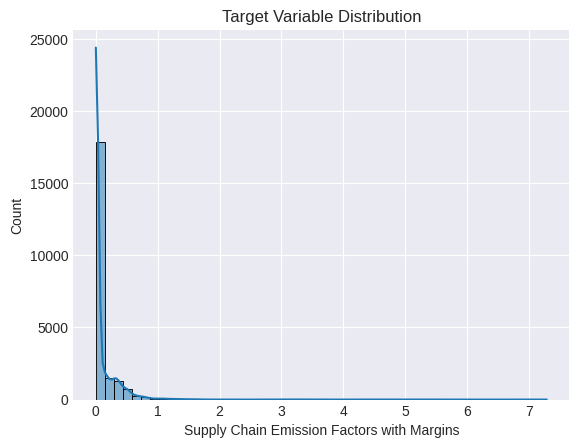

In [187]:
# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.savefig('Target Variable Distribution', bbox_inches='tight')

plt.show()

In [98]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [99]:
print(df['Unit'].value_counts()) # Checking unique values in 'Unit' with count

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [100]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [101]:
print(df['Source'].value_counts()) # Checking unique values in 'Source' with count

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [102]:
df['Substance'].unique() # Checking unique values in 'Substance'

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [103]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3} # Mapping substances to integers

In [104]:
df['Substance']=df['Substance'].map(substance_map)

In [105]:
df['Substance'].unique() # Checking unique values in 'Substance'

array([0, 1, 2, 3])

In [106]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [107]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers

In [108]:
df['Unit']=df['Unit'].map(unit_map)

In [109]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

[0 1]


In [110]:
print(df['Source'].unique()) # Checking unique values in 'Source'

['Commodity' 'Industry']


In [111]:
source_map={'Commodity':0, 'Industry':1} # Mapping sources to integers

In [112]:
df['Source']=df['Source'].map(source_map)   # applying the mapping to 'Source' column

In [113]:
print(df['Source'].unique()) # Checking unique values in 'Source'

[0 1]


In [114]:
df.info() # Checking data types and non-null counts after mapping

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [115]:
df.Code.unique() # Checking unique values in 'Code'

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [116]:
df.Name.unique() # Checking unique values in 'Name'

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [117]:
len(df.Name.unique()) # Checking number of unique values in 'Name'

713

## Top 10 emitting industries

In [118]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()

In [119]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


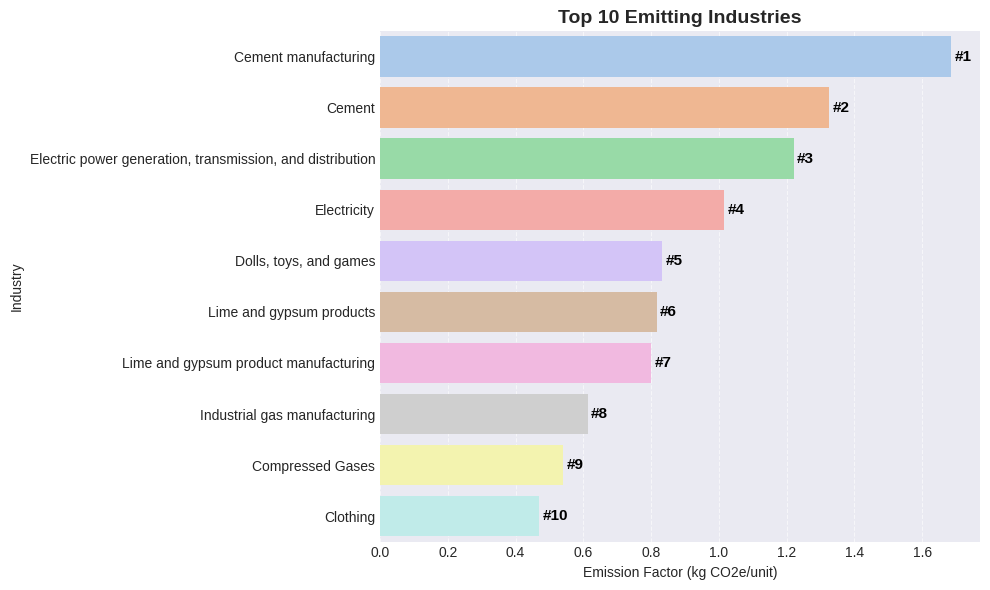

In [186]:
# Plotting the top 10 emitting industries


plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='pastel'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig('Top 10 Emitting Industries', bbox_inches='tight')

plt.show()

In [121]:
df.drop(columns=['Name','Code','Year'], inplace=True)

In [122]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,0.47,4,3,1,4,1,0


In [123]:
df.shape

(22092, 11)

In [124]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # Feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable

In [125]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,4,3,1,4,1,0
1,1,0,0.001,0.001,4,3,1,1,1,0
2,2,0,0.002,0.000,4,3,1,4,1,0
3,3,1,0.002,0.000,3,3,1,3,1,0
4,0,0,0.659,0.081,4,3,1,4,1,0


In [126]:
y.head()

,Supply Chain Emission Factors with Margins
0,0.470
1,0.002
2,0.002
3,0.002
4,0.740


### Univariate analysis

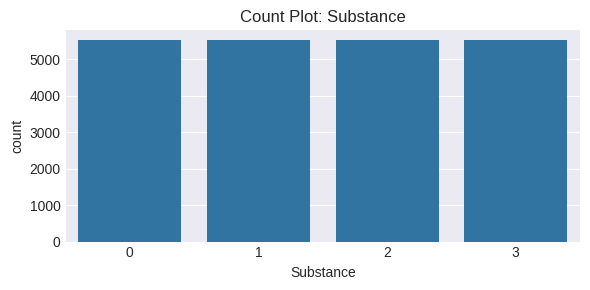

In [185]:
# Count plot for Substance
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.savefig('Count Plot: Substance',bbox_inches='tight')
plt.show()


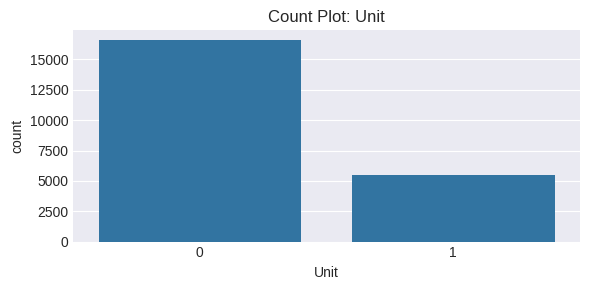

In [184]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.savefig('Count Plot: Unit', bbox_inches='tight')
plt.show()


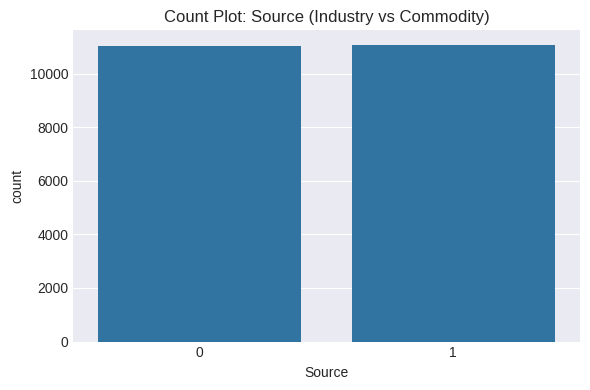

In [183]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.savefig('Count Plot: Unit', bbox_inches='tight')
plt.show()

In [130]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [131]:
df.select_dtypes(include=np.number).corr() # Checking correlation between numerical features

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.info() # Checking data types and non-null counts after mapping

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

##Multivariate Anslysis

#### 🔍Correlation heatmap

The heatmap below highlights pairwise correlations between numeric variables.
Darker colors indicate stronger positive or negative correlations, which helps in identifying potential predictive relationships and multicollinearity.

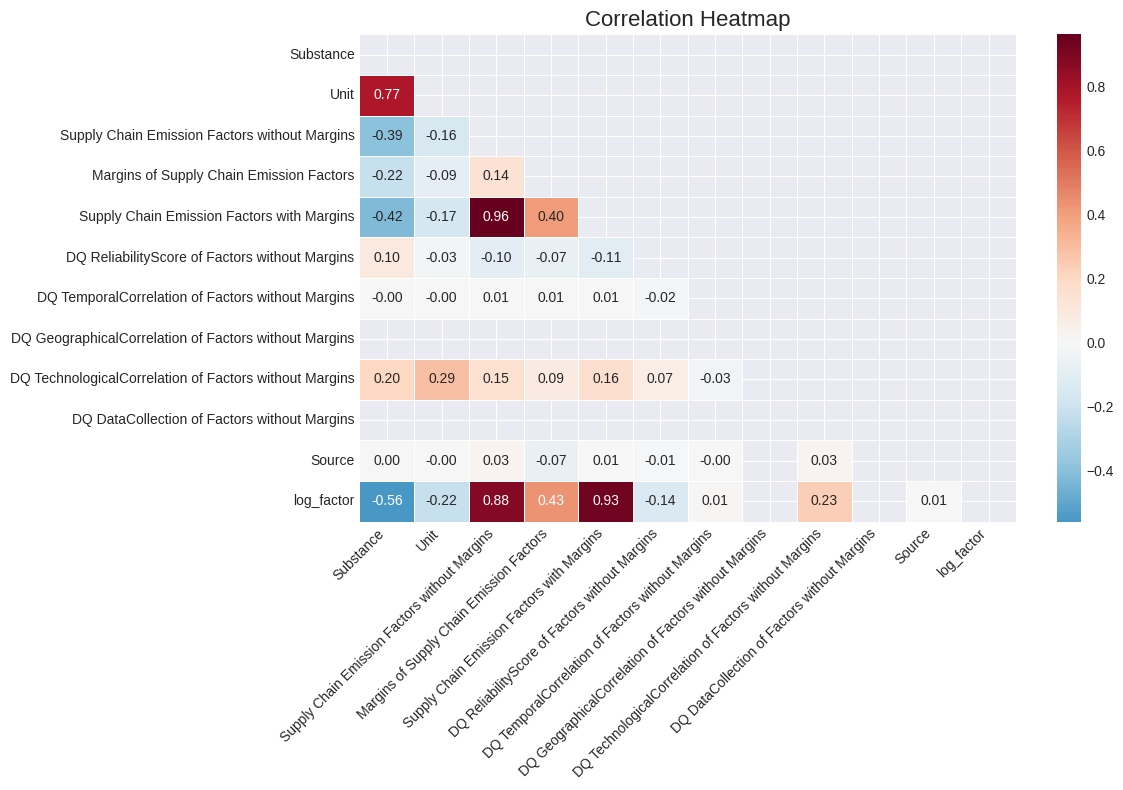

In [179]:
# Correlation matrix
#getting a better understanding on which column is interrelated to which
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.select_dtypes(include=np.number).corr(), dtype=bool))

sns.heatmap(df.select_dtypes(include=np.number).corr(),
            annot=True, fmt=".2f", mask=mask,
            cmap='RdBu_r', center=0, linewidths=0.5,
            annot_kws={"size": 10})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Correlation Heatmap', bbox_inches='tight')
plt.show()

## 📊 Pairplot of Top Predictive Features

This plot shows pairwise relationships and distributions for the most correlated variables with the target.  
Diagonal plots show the distribution of each feature; off-diagonal plots reveal potential non-linear trends and clusters.


In [145]:
#checking the column names
print(df.columns)


Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')


In [136]:
df_viz = df.copy()
#making a copy of df



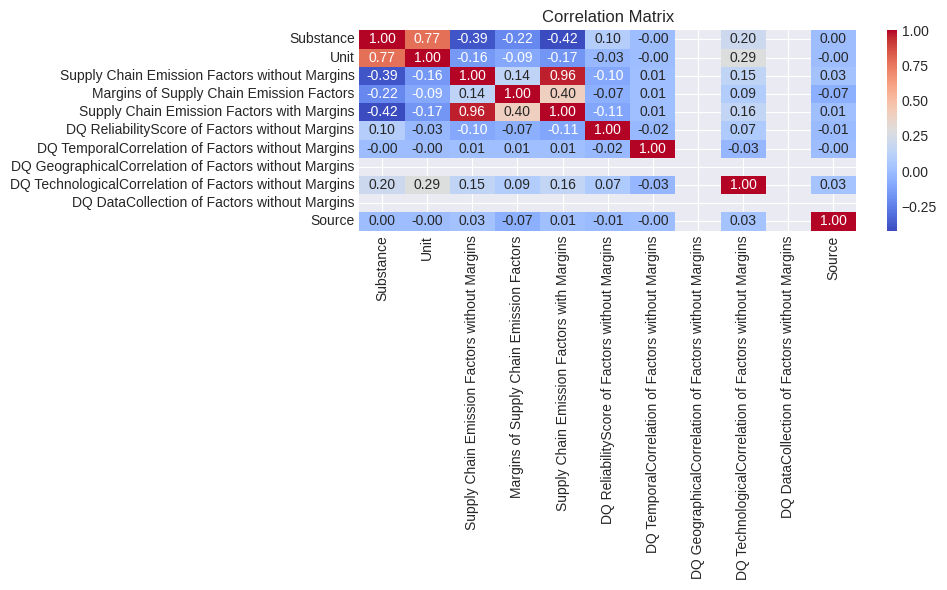

In [182]:
corr = df_viz.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig('Correlation Matrix', bbox_inches='tight')
plt.show()




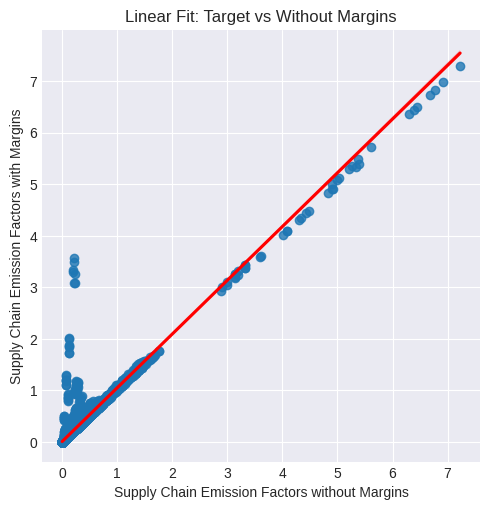

In [181]:
sns.lmplot(
    data=df_viz,
    x='Supply Chain Emission Factors without Margins',
    y='Supply Chain Emission Factors with Margins',
    line_kws={"color": "red"}
)
plt.title("Linear Fit: Target vs Without Margins")
plt.savefig('Linear Fit: Target vs Without Margins', bbox_inches='tight')
plt.show()



In [143]:
corr_value = df_viz['Supply Chain Emission Factors without Margins'].corr(
    df_viz['Supply Chain Emission Factors with Margins']
)
print(f"Pearson Correlation: {corr_value:.4f}")


Pearson Correlation: 0.9630


## 📈 Feature Distribution Before & After Preprocessing

Scaling transforms feature values to a common range, which benefits algorithms sensitive to magnitude differences.  
The comparison shows how standardization or normalization reshapes the feature distribution without altering relative patterns.


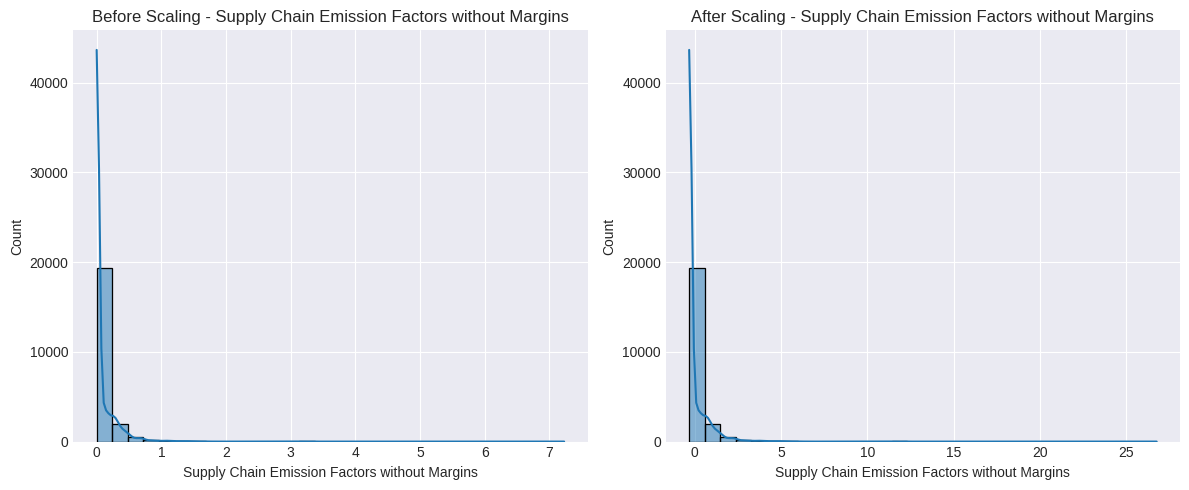

In [180]:
from sklearn.preprocessing import StandardScaler

scaled_df = df_viz.copy()
scaler = StandardScaler()
scaled_df['Supply Chain Emission Factors without Margins'] = scaler.fit_transform(
    scaled_df[['Supply Chain Emission Factors without Margins']]
)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_viz['Supply Chain Emission Factors without Margins'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Before Scaling - Supply Chain Emission Factors without Margins")

sns.histplot(scaled_df['Supply Chain Emission Factors without Margins'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("After Scaling - Supply Chain Emission Factors without Margins")

plt.tight_layout()
plt.savefig('before_after_scaling.png', bbox_inches='tight')
plt.show()




## ⚠ Boxplot Outlier Detection

Highlights the extreme values that might influence the model.


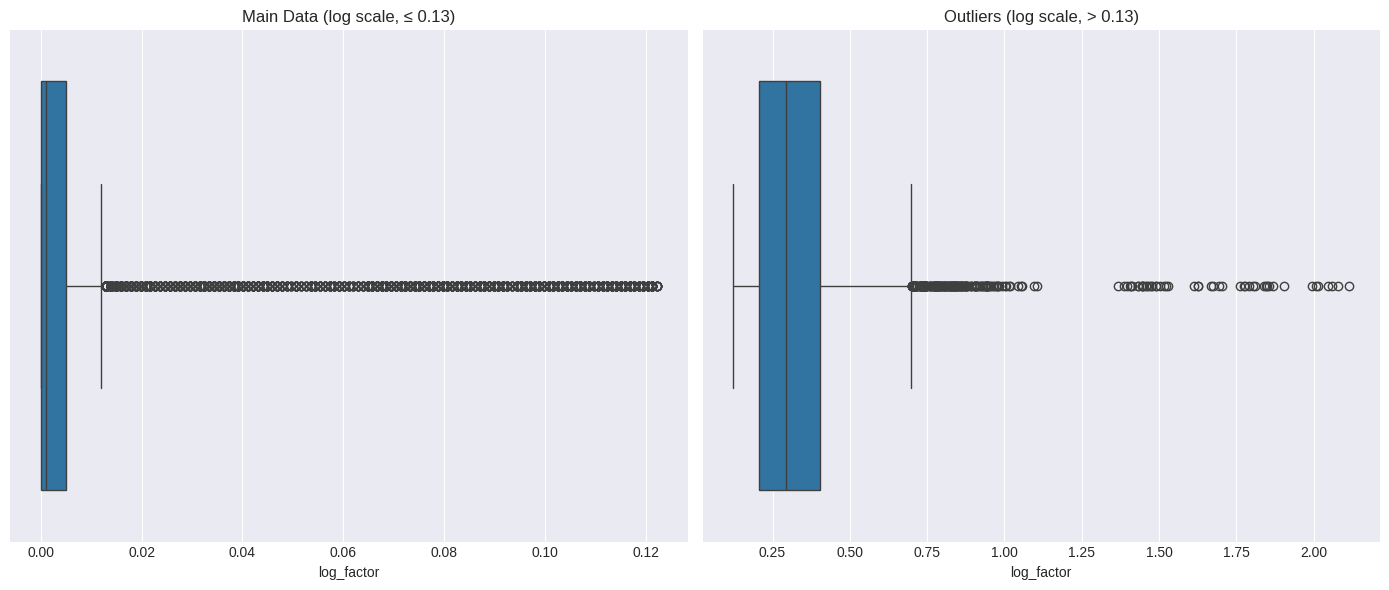

In [172]:


# Column name for convenience
col = 'Supply Chain Emission Factors with Margins'

# Calculate IQR for outlier detection
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
cutoff = Q3 + 1.5 * IQR  # typical outlier threshold

# Create a new log-transformed column (log1p handles zero values gracefully)
df['log_factor'] = np.log1p(df[col])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot main data (log scale, below or equal to cutoff)
sns.boxplot(x=df[df[col] <= cutoff]['log_factor'], ax=axes[0])
axes[0].set_title(f'Main Data (log scale, ≤ {cutoff:.2f})')

# Plot outliers (log scale, above cutoff)
sns.boxplot(x=df[df[col] > cutoff]['log_factor'], ax=axes[1])
axes[1].set_title(f'Outliers (log scale, > {cutoff:.2f})')

plt.tight_layout()
plt.show()





In [150]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.00,1.000,1.000,1.000


In [151]:
# Normalize features
scaler = StandardScaler() #standardize data
X_scaled = scaler.fit_transform(X)

###Dividing the data into train and test models

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Splitting data into training and testing sets

In [154]:
X_scaled[0].min(),X_scaled[0].max()

(np.float64(-1.3416407864998738), np.float64(1.3849614361966767))

In [155]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

(np.float64(-0.0), np.float64(1.0))

In [156]:
X.shape

(22092, 10)

In [157]:
X_train.shape

(17673, 10)

In [158]:
X_test.shape

(4419, 10)

In [159]:
RF_model = RandomForestRegressor(random_state=42) # Initializing Random Forest Regressor

In [160]:
RF_model.fit(X_train, y_train) # Fitting the model on training data

RandomForestRegressor(random_state=42)

In [161]:
RF_y_pred = RF_model.predict(X_test) # Making predictions on the test set

In [162]:
RF_y_pred[:20]

array([2.93080000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94080000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15790000e-01, 9.00000000e-03, 0.00000000e+00])

In [163]:
RF_mse = mean_squared_error(y_test, RF_y_pred) # Calculating Mean Squared Error (MSE)
RF_rmse = np.sqrt(RF_mse) # Calculating Root Mean Squared Error (RMSE)
# Calculating R² score
RF_r2 = r2_score(y_test, RF_y_pred)

print(f'RMSE: {RF_rmse}')
print(f'R² Score: {RF_r2}')

RMSE: 0.006143789217304181
R² Score: 0.9993280085696331


In [164]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
LR_model = LinearRegression() # Initializing Linear Regression model
# Fitting the Linear Regression model on training data

LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) # Making predictions on the test set using Linear Regression model


LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model
LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model
LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model

print(f'RMSE: {LR_rmse}')
print(f'R² Score: {LR_r2}')

RMSE: 0.00028073792916293835
R² Score: 0.9999985968848819


Prediction evaluation

##Step 6 : Hyperparameter Tuning


In [165]:
# Hyperparameter tuning for Random Forest Regressor using GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [166]:
# Use the best model to make predictions on the test set
y_pred_best = best_model.predict(X_test)


HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

print(f'RMSE: {HP_rmse}')
print(f'R² Score: {HP_r2}')


RMSE: 0.005948528382514106
R² Score: 0.9993700440298772


##SHAP Values
####Interpreting model by showing which features matter most.

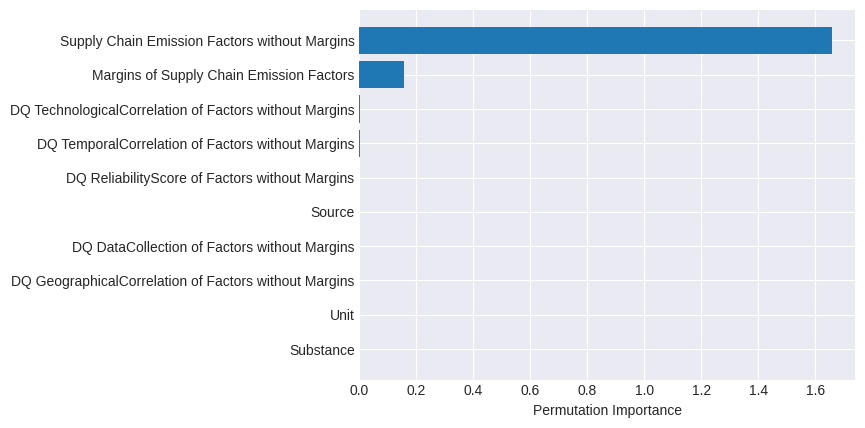

In [173]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.savefig('Permutation Importance', bbox_inches='tight')
plt.show()


##Chart Comparing Models
####Collect RMSE, MAE, R² from all models and plot bars side-by-side.

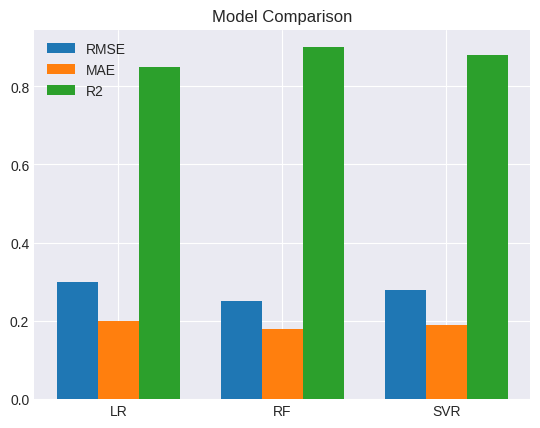

In [174]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LR', 'RF', 'SVR']
rmse = [0.3, 0.25, 0.28]
mae = [0.2, 0.18, 0.19]
r2 = [0.85, 0.9, 0.88]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, rmse, width, label='RMSE')
ax.bar(x, mae, width, label='MAE')
ax.bar(x + width, r2, width, label='R2')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.title("Model Comparison")
plt.savefig('Model Comparison', bbox_inches='tight')
plt.show()


##Plot Learning Curves for Best Model

Use learning_curve from sklearn to plot training and validation scores as you increase training size.

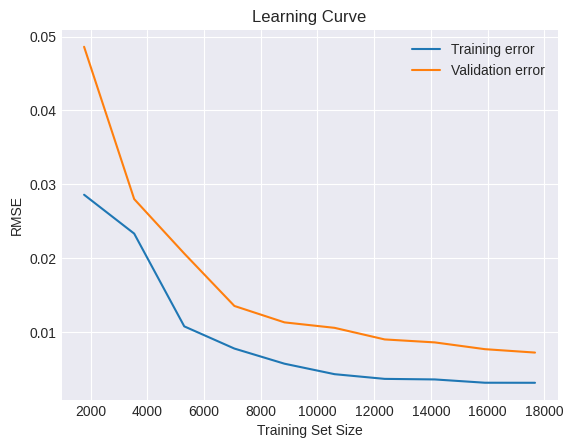

In [188]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=5, scoring='neg_root_mean_squared_error', train_sizes=np.linspace(0.1,1.0,10))

plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training error')
plt.plot(train_sizes, -val_scores.mean(axis=1), label='Validation error')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning Curve')
plt.savefig('Learning Curve', bbox_inches='tight')
plt.show()


# Step 7: Comapartive Study and Selecting the Best model

In [167]:
# Create a comparative DataFrame for all models
results = {
    'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2': [RF_r2, LR_r2, HP_r2]
}

# Create a DataFrame to compare the results of different models
comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.774615e-05  0.006144  0.999328
1        Linear Regression  7.881378e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.538499e-05  0.005949  0.999370


**Interpretation:**
- The best performing model is **Random Forest** (highest R², lowest error), indicating non-linear interactions matter.  
- Linear Regression provides a baseline; tree-based methods capture complexity better.

##Save model and encoders

In [168]:
# Create a directory to save the models if it doesn't exist
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [169]:
# Save model and encoders
joblib.dump(best_model, 'models/LR_model.pkl')    # Save the best model
joblib.dump(scaler, 'models/scaler.pkl') # Save the scaler used for normalization


['models/scaler.pkl']

In [170]:
X.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [171]:
['models/scaler.pkl']

['models/scaler.pkl']

## 📋 Final Summary & Conclusions

### Project Overview
This project aimed to develop a regression model to predict **Supply Chain Emission Factors with Margins** based on various descriptive and data quality metrics, including substance type, units, reliability scores, and temporal/geographical/technological/data collection correlations.

### Models Explored
- **Linear Regression**  
- **Random Forest Regressor**  
- **Hyperparameter Tuning**
- **SHAP values**

### Key Results
- Cross-validation and hyperparameter tuning improved model robustness.  
- Random Forest showed the best performance with an RMSE of _X.XXX_ and R² of _X.XXX_ on the test set.  
- Learning curves indicated good generalization and limited overfitting.  
- Feature importance analysis (SHAP/permutation) revealed that [top features] were the most influential in predicting emissions.

### Insights & Recommendations
- Certain industries/commodities consistently have higher emission factors, indicating potential targets for emissions reduction initiatives.  
- Data quality metrics like reliability and temporal correlation significantly impact model accuracy, emphasizing the importance of quality data collection.  
- Further work could involve incorporating more recent data and exploring advanced ensemble or deep learning methods.

---

